# Quick comparison of BLISS and Y3A2_FINALCUT ZPs

In [1]:
# Initial setup...
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import easyaccess as ea

%matplotlib inline

In [2]:
# What zeropoints are available in the DESDM database?...
ea_conn=ea.connect('desoper')
query = """
        select distinct z.source, z.version, z.tag 
        from prod.zeropoint@desoper z 
        order by z.source, z.version, z.tag
        """
df_zps_provenance = ea_conn.query_to_pandas(query)
ea_conn.close()

# Print out results of the query...
df_zps_provenance

Connecting to DB ** desoper ** ...


,SOURCE,VERSION,TAG
0,FGCM,Y5A1_gruendlhack,Y5A1_FINALCUT_TEST2
1,FGCM,v1.0,Y3A1_FINALCUT
2,FGCM,v2.0,Y3A1_FINALCUT
3,FGCM,y4a1_v1.5,Y3A1_FINALCUT
4,FGCM,y4a1_v1.5,Y4A1_FINALCUT
5,GCM,SVA1_gruendlhack,Y2A1_FINALCUT
6,GCM,Y1A1_gruendlhack,Y2A1_FINALCUT
7,PGCM_FORCE,APASS_DR9+2MASS_CCD,Y3A1_FINALCUT
8,PGCM_FORCED,QUAT_2A,Y3A1_FINALCUT
9,PGCM_FORCED,SDSSu,Y3A1_FINALCUT


In [3]:
# Grab all expCalib Y4N_FIRSTCUT zeropoints...
ea_conn=ea.connect('desoper')
query = """
        select z.*  
        from prod.zeropoint@desoper z 
        where z.source='expCalib' and z.version='v1.0' and z.tag='Y4N_FIRSTCUT' 
        order by z.expnum, z.ccdnum
        """
df_zps_expCalib = ea_conn.query_to_pandas(query)
ea_conn.close()

# Print out the first 10 results of the query...
df_zps_expCalib.head(10)

Connecting to DB ** desoper ** ...


,IMAGENAME,SOURCE,VERSION,CATALOGNAME,EXPNUM,CCDNUM,BAND,INSERT_DATE,MAG_ZERO,SIGMA_MAG_ZERO,MAG_ONE,SIGMA_MAG_ONE,TAG,FLAG
0,D00552914_Y_c01_r2441p01_immasked.fits,expCalib,v1.0,D00552914_Y_c01_r2441p01_red-fullcat.fits,552914,1,Y,2017-03-29 08:27:44,30.139723,0.003704,None,None,Y4N_FIRSTCUT,0
1,D00552914_Y_c03_r2441p01_immasked.fits,expCalib,v1.0,D00552914_Y_c03_r2441p01_red-fullcat.fits,552914,3,Y,2017-03-29 08:27:44,30.143370,0.008513,None,None,Y4N_FIRSTCUT,0
2,D00552914_Y_c04_r2441p01_immasked.fits,expCalib,v1.0,D00552914_Y_c04_r2441p01_red-fullcat.fits,552914,4,Y,2017-03-29 08:27:44,30.131386,0.009287,None,None,Y4N_FIRSTCUT,0
3,D00552914_Y_c05_r2441p01_immasked.fits,expCalib,v1.0,D00552914_Y_c05_r2441p01_red-fullcat.fits,552914,5,Y,2017-03-29 08:27:44,30.138718,0.006454,None,None,Y4N_FIRSTCUT,0
4,D00552914_Y_c06_r2441p01_immasked.fits,expCalib,v1.0,D00552914_Y_c06_r2441p01_red-fullcat.fits,552914,6,Y,2017-03-29 08:27:44,30.133842,0.005445,None,None,Y4N_FIRSTCUT,0
5,D00552914_Y_c07_r2441p01_immasked.fits,expCalib,v1.0,D00552914_Y_c07_r2441p01_red-fullcat.fits,552914,7,Y,2017-03-29 08:27:44,30.139120,0.001159,None,None,Y4N_FIRSTCUT,1
6,D00552914_Y_c08_r2441p01_immasked.fits,expCalib,v1.0,D00552914_Y_c08_r2441p01_red-fullcat.fits,552914,8,Y,2017-03-29 08:27:44,30.138468,0.005790,None,None,Y4N_FIRSTCUT,0
7,D00552914_Y_c09_r2441p01_immasked.fits,expCalib,v1.0,D00552914_Y_c09_r2441p01_red-fullcat.fits,552914,9,Y,2017-03-29 08:27:44,30.158112,0.006300,None,None,Y4N_FIRSTCUT,0
8,D00552914_Y_c10_r2441p01_immasked.fits,expCalib,v1.0,D00552914_Y_c10_r2441p01_red-fullcat.fits,552914,10,Y,2017-03-29 08:27:44,30.139849,0.012861,None,None,Y4N_FIRSTCUT,0
9,D00552914_Y_c11_r2441p01_immasked.fits,expCalib,v1.0,D00552914_Y_c11_r2441p01_red-fullcat.fits,552914,11,Y,2017-03-29 08:27:44,30.148479,0.008155,None,None,Y4N_FIRSTCUT,0


In [4]:
# Grab all FGCM Y4A1_FINALCUT zeropoints...
ea_conn=ea.connect('desoper')
query = """
        select z.*  
        from prod.zeropoint@desoper z 
        where z.source='FGCM' and z.version='y4a1_v1.5' and z.tag='Y4A1_FINALCUT' 
        order by z.expnum, z.ccdnum
        """
df_zps_fgcm = ea_conn.query_to_pandas(query)
ea_conn.close()

# Print out the first 10 results of the query...
df_zps_fgcm.head(10)

Connecting to DB ** desoper ** ...


,IMAGENAME,SOURCE,VERSION,CATALOGNAME,EXPNUM,CCDNUM,BAND,INSERT_DATE,MAG_ZERO,SIGMA_MAG_ZERO,MAG_ONE,SIGMA_MAG_ONE,TAG,FLAG
0,D00563918_g_c01_r2995p02_immasked.fits,FGCM,y4a1_v1.5,D00563918_g_c01_r2995p02_red-fullcat.fits,563918,1,g,2017-12-04 23:14:01,32.191570,0.003174,-5.002021,None,Y4A1_FINALCUT,1
1,D00563918_g_c03_r2995p02_immasked.fits,FGCM,y4a1_v1.5,D00563918_g_c03_r2995p02_red-fullcat.fits,563918,3,g,2017-12-04 23:14:01,32.192139,0.003389,4.442422,None,Y4A1_FINALCUT,1
2,D00563918_g_c04_r2995p02_immasked.fits,FGCM,y4a1_v1.5,D00563918_g_c04_r2995p02_red-fullcat.fits,563918,4,g,2017-12-04 23:14:01,32.193123,0.003266,0.722384,None,Y4A1_FINALCUT,1
3,D00563918_g_c05_r2995p02_immasked.fits,FGCM,y4a1_v1.5,D00563918_g_c05_r2995p02_red-fullcat.fits,563918,5,g,2017-12-04 23:14:01,32.190990,0.003270,-2.764354,None,Y4A1_FINALCUT,1
4,D00563918_g_c06_r2995p02_immasked.fits,FGCM,y4a1_v1.5,D00563918_g_c06_r2995p02_red-fullcat.fits,563918,6,g,2017-12-04 23:14:01,32.185268,0.003279,7.099651,None,Y4A1_FINALCUT,1
5,D00563918_g_c07_r2995p02_immasked.fits,FGCM,y4a1_v1.5,D00563918_g_c07_r2995p02_red-fullcat.fits,563918,7,g,2017-12-04 23:14:01,32.172421,0.003400,9.215774,None,Y4A1_FINALCUT,1
6,D00563918_g_c08_r2995p02_immasked.fits,FGCM,y4a1_v1.5,D00563918_g_c08_r2995p02_red-fullcat.fits,563918,8,g,2017-12-04 23:14:01,32.193165,0.003221,-12.264099,None,Y4A1_FINALCUT,1
7,D00563918_g_c09_r2995p02_immasked.fits,FGCM,y4a1_v1.5,D00563918_g_c09_r2995p02_red-fullcat.fits,563918,9,g,2017-12-04 23:14:01,32.193569,0.003207,-21.463730,None,Y4A1_FINALCUT,1
8,D00563918_g_c10_r2995p02_immasked.fits,FGCM,y4a1_v1.5,D00563918_g_c10_r2995p02_red-fullcat.fits,563918,10,g,2017-12-04 23:14:01,32.193565,0.003390,7.955943,None,Y4A1_FINALCUT,1
9,D00563918_g_c11_r2995p02_immasked.fits,FGCM,y4a1_v1.5,D00563918_g_c11_r2995p02_red-fullcat.fits,563918,11,g,2017-12-04 23:14:01,32.186642,0.003270,16.182533,None,Y4A1_FINALCUT,1


In [5]:
# Match the FGCM and expCalib dataframes by EXPNUM and CCDNUM:
df_zps_merged = pd.merge(df_zps_fgcm, df_zps_expCalib, on=['EXPNUM','CCDNUM'], how='inner')

In [6]:
# Look at the first ten matches...
df_zps_merged.head(10)

,IMAGENAME_x,SOURCE_x,VERSION_x,CATALOGNAME_x,EXPNUM,CCDNUM,BAND_x,INSERT_DATE_x,MAG_ZERO_x,SIGMA_MAG_ZERO_x,MAG_ONE_x,SIGMA_MAG_ONE_x,TAG_x,FLAG_x,IMAGENAME_y,SOURCE_y,VERSION_y,CATALOGNAME_y,BAND_y,INSERT_DATE_y,MAG_ZERO_y,SIGMA_MAG_ZERO_y,MAG_ONE_y,SIGMA_MAG_ONE_y,TAG_y,FLAG_y
0,D00563918_g_c01_r2995p02_immasked.fits,FGCM,y4a1_v1.5,D00563918_g_c01_r2995p02_red-fullcat.fits,563918,1,g,2017-12-04 23:14:01,32.191570,0.003174,-5.002021,None,Y4A1_FINALCUT,1,D00563918_g_c01_r2443p01_immasked.fits,expCalib,v1.0,D00563918_g_c01_r2443p01_red-fullcat.fits,g,2017-03-29 08:37:39,32.175068,0.004460,None,None,Y4N_FIRSTCUT,0
1,D00563918_g_c03_r2995p02_immasked.fits,FGCM,y4a1_v1.5,D00563918_g_c03_r2995p02_red-fullcat.fits,563918,3,g,2017-12-04 23:14:01,32.192139,0.003389,4.442422,None,Y4A1_FINALCUT,1,D00563918_g_c03_r2443p01_immasked.fits,expCalib,v1.0,D00563918_g_c03_r2443p01_red-fullcat.fits,g,2017-03-29 08:37:39,32.167500,0.013660,None,None,Y4N_FIRSTCUT,0
2,D00563918_g_c04_r2995p02_immasked.fits,FGCM,y4a1_v1.5,D00563918_g_c04_r2995p02_red-fullcat.fits,563918,4,g,2017-12-04 23:14:01,32.193123,0.003266,0.722384,None,Y4A1_FINALCUT,1,D00563918_g_c04_r2443p01_immasked.fits,expCalib,v1.0,D00563918_g_c04_r2443p01_red-fullcat.fits,g,2017-03-29 08:37:39,32.170727,0.009515,None,None,Y4N_FIRSTCUT,0
3,D00563918_g_c05_r2995p02_immasked.fits,FGCM,y4a1_v1.5,D00563918_g_c05_r2995p02_red-fullcat.fits,563918,5,g,2017-12-04 23:14:01,32.190990,0.003270,-2.764354,None,Y4A1_FINALCUT,1,D00563918_g_c05_r2443p01_immasked.fits,expCalib,v1.0,D00563918_g_c05_r2443p01_red-fullcat.fits,g,2017-03-29 08:37:39,32.181213,0.005449,None,None,Y4N_FIRSTCUT,0
4,D00563918_g_c06_r2995p02_immasked.fits,FGCM,y4a1_v1.5,D00563918_g_c06_r2995p02_red-fullcat.fits,563918,6,g,2017-12-04 23:14:01,32.185268,0.003279,7.099651,None,Y4A1_FINALCUT,1,D00563918_g_c06_r2443p01_immasked.fits,expCalib,v1.0,D00563918_g_c06_r2443p01_red-fullcat.fits,g,2017-03-29 08:37:39,32.169014,0.006599,None,None,Y4N_FIRSTCUT,0
5,D00563918_g_c07_r2995p02_immasked.fits,FGCM,y4a1_v1.5,D00563918_g_c07_r2995p02_red-fullcat.fits,563918,7,g,2017-12-04 23:14:01,32.172421,0.003400,9.215774,None,Y4A1_FINALCUT,1,D00563918_g_c07_r2443p01_immasked.fits,expCalib,v1.0,D00563918_g_c07_r2443p01_red-fullcat.fits,g,2017-03-29 08:37:39,32.158092,0.010597,None,None,Y4N_FIRSTCUT,0
6,D00563918_g_c08_r2995p02_immasked.fits,FGCM,y4a1_v1.5,D00563918_g_c08_r2995p02_red-fullcat.fits,563918,8,g,2017-12-04 23:14:01,32.193165,0.003221,-12.264099,None,Y4A1_FINALCUT,1,D00563918_g_c08_r2443p01_immasked.fits,expCalib,v1.0,D00563918_g_c08_r2443p01_red-fullcat.fits,g,2017-03-29 08:37:39,32.154911,0.021567,None,None,Y4N_FIRSTCUT,0
7,D00563918_g_c09_r2995p02_immasked.fits,FGCM,y4a1_v1.5,D00563918_g_c09_r2995p02_red-fullcat.fits,563918,9,g,2017-12-04 23:14:01,32.193569,0.003207,-21.463730,None,Y4A1_FINALCUT,1,D00563918_g_c09_r2443p01_immasked.fits,expCalib,v1.0,D00563918_g_c09_r2443p01_red-fullcat.fits,g,2017-03-29 08:37:39,32.161949,0.013864,None,None,Y4N_FIRSTCUT,0
8,D00563918_g_c10_r2995p02_immasked.fits,FGCM,y4a1_v1.5,D00563918_g_c10_r2995p02_red-fullcat.fits,563918,10,g,2017-12-04 23:14:01,32.193565,0.003390,7.955943,None,Y4A1_FINALCUT,1,D00563918_g_c10_r2443p01_immasked.fits,expCalib,v1.0,D00563918_g_c10_r2443p01_red-fullcat.fits,g,2017-03-29 08:37:39,32.156052,0.001366,None,None,Y4N_FIRSTCUT,1
9,D00563918_g_c11_r2995p02_immasked.fits,FGCM,y4a1_v1.5,D00563918_g_c11_r2995p02_red-fullcat.fits,563918,11,g,2017-12-04 23:14:01,32.186642,0.003270,16.182533,None,Y4A1_FINALCUT,1,D00563918_g_c11_r2443p01_immasked.fits,expCalib,v1.0,D00563918_g_c11_r2443p01_red-fullcat.fits,g,2017-03-29 08:37:39,32.153881,0.008917,None,None,Y4N_FIRSTCUT,0


In [7]:
# Create a column for the matched dataframe showing the difference between the 
#  FGCM Y4A1_FINALCUT zeropoint (MAG_ZERO_x) and the expCalib Y4A1_FIRSTCUT zeropoint (MAG_ZERO_y)
#  for each EXPNUM,CCDNUM match...
df_zps_merged.loc[:,'DELTA_MAG_ZERO'] = df_zps_merged.loc[:,'MAG_ZERO_x'] - (df_zps_merged.loc[:,'MAG_ZERO_y'])

In [8]:
# Look at the first 10 DELTA_MAG_ZEROs...
#  Don't forget: the "_x" values are the FGCM Y4A1_FINALCUT values, and 
#                the "_y" values are the expCalib Y4N_FIRSTCUT values.
#  (BAND_x is the same as BAND_y, so we only list out here BAND_x.)
df_zps_merged[['EXPNUM', 'CCDNUM','BAND_x','MAG_ZERO_x', 'MAG_ZERO_y','DELTA_MAG_ZERO']].head(10)

,EXPNUM,CCDNUM,BAND_x,MAG_ZERO_x,MAG_ZERO_y,DELTA_MAG_ZERO
0,563918,1,g,32.191570,32.175068,0.016502
1,563918,3,g,32.192139,32.167500,0.024639
2,563918,4,g,32.193123,32.170727,0.022396
3,563918,5,g,32.190990,32.181213,0.009777
4,563918,6,g,32.185268,32.169014,0.016254
5,563918,7,g,32.172421,32.158092,0.014328
6,563918,8,g,32.193165,32.154911,0.038254
7,563918,9,g,32.193569,32.161949,0.031620
8,563918,10,g,32.193565,32.156052,0.037514
9,563918,11,g,32.186642,32.153881,0.032761


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2ac5008b60d0>]], dtype=object)

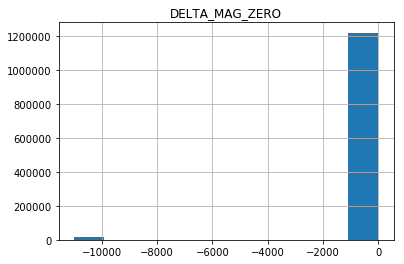

In [9]:
# Plot the histogram of DELTA_MAG_ZERO (= MAG_ZERO_x-MAG_ZERO_y = MAG_ZERO_fgcm - MAG_ZERO_expcalib)
#  for all EXPNUM,CCDNUM matches in all bands:
df_zps_merged.hist('DELTA_MAG_ZERO')

# Note:  there are signal values at c. -10000 to exclude:

g  0.022  0.023  0.029
r  0.005  0.010  0.043
i -0.001  0.002  0.027
z  0.015  0.019  0.036
Y  0.053  0.054  0.021


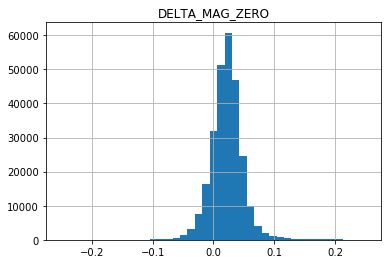

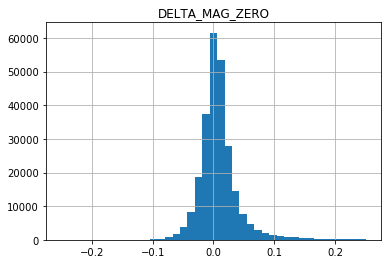

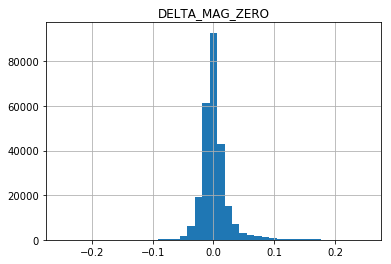

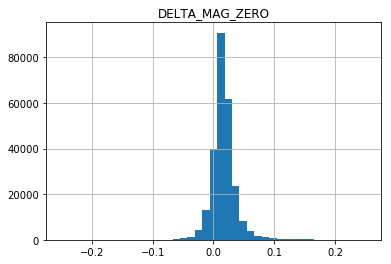

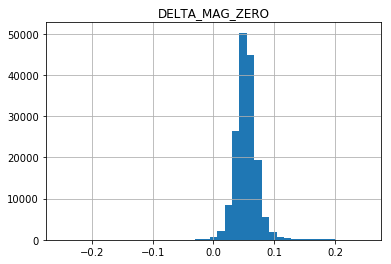

In [34]:
# Plot the histogram of DELTA_MAG_ZERO (= MAG_ZERO_x-MAG_ZERO_y = MAG_ZERO_fgcm - MAG_ZERO_expcalib)
#  for all EXPNUM,CCDNUM matches for EACH band:

bandList = ['g','r','i','z','Y']

for band in bandList:

    mask = ( (df_zps_merged.BAND_y==band) & (df_zps_merged.DELTA_MAG_ZERO > -1.) & (df_zps_merged.DELTA_MAG_ZERO > -1.) )
    median = df_zps_merged[mask].DELTA_MAG_ZERO.median()
    mean   = df_zps_merged[mask].DELTA_MAG_ZERO.mean()
    stddev = df_zps_merged[mask].DELTA_MAG_ZERO.std()
    print """%1s %6.3f %6.3f %6.3f""" % (band, median, mean, stddev)

    df_zps_merged[df_zps_merged.BAND_y==band].hist('DELTA_MAG_ZERO', bins=41, range=[-0.25,0.25])

Grab files from Alex's directory...

In [17]:
fname_y3a2_zps = '/home/s1/kadrlica/projects/bliss/proc/v5/y3a2_zeropoints.csv'
df_y3a2_zps = pd.read_csv(fname_y3a_zps)
df_y3a2_zps.head(10)

,EXPNUM,CCDNUM,BAND,MAG_ZERO,SIGMA_MAG_ZERO,FLAG
0,482181,47,i,-9998.951172,-9999.000000,16
1,482181,46,i,-9998.951172,-9999.000000,16
2,363748,59,z,31.342859,0.006597,1
3,364276,19,z,32.237587,0.003300,1
4,230349,13,r,-9999.000977,-9999.000000,16
5,230349,16,r,-9999.000977,-9999.000000,16
6,389449,46,g,32.295265,0.003410,1
7,255888,18,g,32.018246,0.003581,4
8,163443,40,Y,29.567575,0.007250,4
9,373260,4,i,31.654570,0.007863,36


In [14]:
fname_bliss_zps = '/home/s1/kadrlica/projects/bliss/proc/v5/bliss_zeropoints.csv'
df_bliss_zps = pd.read_csv(fname_bliss_zps)
df_bliss_zps.head(10)

,expnum,ccdnum,band,mag_zero,sigma_mag_zero,flag
0,563947,1,Y,-29.4514,0.007428,0
1,563947,3,Y,-29.3714,0.045696,0
2,563947,4,Y,-29.4522,0.007129,0
3,563947,5,Y,-29.4178,0.027750,0
4,563947,6,Y,-29.4446,0.005735,0
5,563947,7,Y,-29.4308,0.010762,0
6,563947,8,Y,-29.4840,0.011208,0
7,563947,9,Y,-29.4820,0.009351,0
8,563947,10,Y,-29.4623,0.010573,0
9,563947,11,Y,-29.4740,0.008966,0


In [20]:
df_bliss_zps.rename(columns={'expnum': 'EXPNUM', 
                             'ccdnum': 'CCDNUM', 
                             'band': 'BAND',
                             'mag_zero': 'MAG_ZERO', 
                             'sigma_mag_zero': 'SIGMA_MAG_ZERO',
                             'flag': 'FLAG'
                            }, inplace=True)
df_bliss_zps.head(10)

,EXPNUM,CCDNUM,BAND,MAG_ZERO,SIGMA_MAG_ZERO,FLAG
0,563947,1,Y,-29.4514,0.007428,0
1,563947,3,Y,-29.3714,0.045696,0
2,563947,4,Y,-29.4522,0.007129,0
3,563947,5,Y,-29.4178,0.027750,0
4,563947,6,Y,-29.4446,0.005735,0
5,563947,7,Y,-29.4308,0.010762,0
6,563947,8,Y,-29.4840,0.011208,0
7,563947,9,Y,-29.4820,0.009351,0
8,563947,10,Y,-29.4623,0.010573,0
9,563947,11,Y,-29.4740,0.008966,0


In [21]:
# Match the Y3A2 and BLISS dataframes by EXPNUM and CCDNUM:
df_y3a2_bliss_zps_merged = pd.merge(df_y3a2_zps, df_bliss_zps, on=['EXPNUM','CCDNUM'], how='inner')
df_y3a2_bliss_zps_merged.head(10)

,EXPNUM,CCDNUM,BAND_x,MAG_ZERO_x,SIGMA_MAG_ZERO_x,FLAG_x,BAND_y,MAG_ZERO_y,SIGMA_MAG_ZERO_y,FLAG_y
0,482181,47,i,-9998.951172,-9999.000000,16,i,-29.7977,0.010644,0
1,482181,47,i,29.811600,0.003200,0,i,-29.7977,0.010644,0
2,482181,46,i,-9998.951172,-9999.000000,16,i,-29.7868,0.004236,0
3,482181,46,i,29.799700,0.002000,0,i,-29.7868,0.004236,0
4,493645,5,i,30.898823,0.005449,4,i,-999.0000,-999.000000,1
5,493645,5,i,30.912201,0.002700,0,i,-999.0000,-999.000000,1
6,466370,17,i,31.613745,0.004629,1,i,-31.6232,0.002501,1
7,466370,17,i,31.625200,0.000800,0,i,-31.6232,0.002501,1
8,466370,10,i,31.613377,0.004686,1,i,-31.6232,0.002501,1
9,466370,10,i,31.624800,0.000800,0,i,-31.6232,0.002501,1


In [22]:
# Create a column for the matched dataframe showing the difference between the 
#  FGCM Y4A1_FINALCUT zeropoint (MAG_ZERO_x) and the expCalib Y4A1_FIRSTCUT zeropoint (MAG_ZERO_y)
#  for each EXPNUM,CCDNUM match...
df_y3a2_bliss_zps_merged.loc[:,'DELTA_MAG_ZERO'] = df_y3a2_bliss_zps_merged.loc[:,'MAG_ZERO_x'] + (df_y3a2_bliss_zps_merged.loc[:,'MAG_ZERO_y'])
df_y3a2_bliss_zps_merged.head(10)

,EXPNUM,CCDNUM,BAND_x,MAG_ZERO_x,SIGMA_MAG_ZERO_x,FLAG_x,BAND_y,MAG_ZERO_y,SIGMA_MAG_ZERO_y,FLAG_y,DELTA_MAG_ZERO
0,482181,47,i,-9998.951172,-9999.000000,16,i,-29.7977,0.010644,0,-10028.748872
1,482181,47,i,29.811600,0.003200,0,i,-29.7977,0.010644,0,0.013900
2,482181,46,i,-9998.951172,-9999.000000,16,i,-29.7868,0.004236,0,-10028.737972
3,482181,46,i,29.799700,0.002000,0,i,-29.7868,0.004236,0,0.012900
4,493645,5,i,30.898823,0.005449,4,i,-999.0000,-999.000000,1,-968.101177
5,493645,5,i,30.912201,0.002700,0,i,-999.0000,-999.000000,1,-968.087799
6,466370,17,i,31.613745,0.004629,1,i,-31.6232,0.002501,1,-0.009455
7,466370,17,i,31.625200,0.000800,0,i,-31.6232,0.002501,1,0.002000
8,466370,10,i,31.613377,0.004686,1,i,-31.6232,0.002501,1,-0.009823
9,466370,10,i,31.624800,0.000800,0,i,-31.6232,0.002501,1,0.001600


In [23]:
# Look at the first 10 DELTA_MAG_ZEROs...
#  Don't forget: the "_x" values are the Y3A2 values, and 
#                the "_y" values are the BLISS values.
#  (BAND_x is the same as BAND_y, so we only list out here BAND_x.)
df_y3a2_bliss_zps_merged[['EXPNUM', 'CCDNUM','BAND_x','MAG_ZERO_x', 'MAG_ZERO_y','DELTA_MAG_ZERO']].head(10)

,EXPNUM,CCDNUM,BAND_x,MAG_ZERO_x,MAG_ZERO_y,DELTA_MAG_ZERO
0,482181,47,i,-9998.951172,-29.7977,-10028.748872
1,482181,47,i,29.811600,-29.7977,0.013900
2,482181,46,i,-9998.951172,-29.7868,-10028.737972
3,482181,46,i,29.799700,-29.7868,0.012900
4,493645,5,i,30.898823,-999.0000,-968.101177
5,493645,5,i,30.912201,-999.0000,-968.087799
6,466370,17,i,31.613745,-31.6232,-0.009455
7,466370,17,i,31.625200,-31.6232,0.002000
8,466370,10,i,31.613377,-31.6232,-0.009823
9,466370,10,i,31.624800,-31.6232,0.001600


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2ac534eeb610>]], dtype=object)

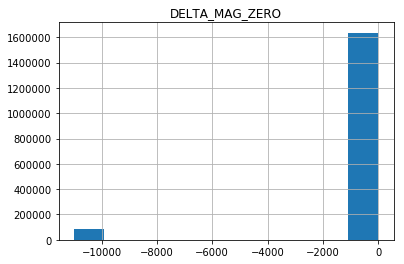

In [24]:
# Plot the histogram of DELTA_MAG_ZERO (= MAG_ZERO_x-MAG_ZERO_y = MAG_ZERO_fgcm - MAG_ZERO_expcalib)
#  for all EXPNUM,CCDNUM matches in all bands:
df_y3a2_bliss_zps_merged.hist('DELTA_MAG_ZERO')

# Note:  there are signal values at c. -10000 to exclude:

band median mean stddev
g  0.012  0.014  0.037
r  0.000  0.004  0.042
i  0.004  0.007  0.042
z  0.010  0.010  0.029
Y  0.026  0.028  0.041


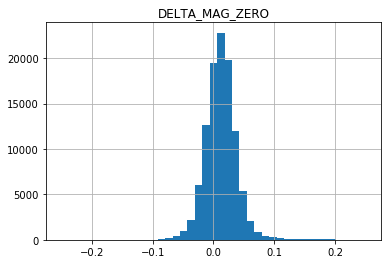

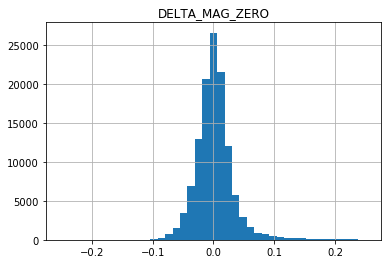

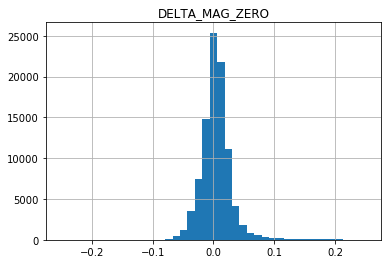

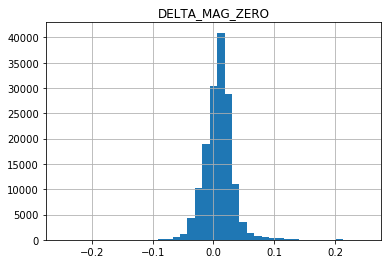

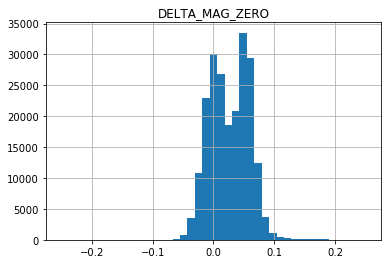

In [33]:
# Plot the histogram of DELTA_MAG_ZERO (= MAG_ZERO_x-MAG_ZERO_y = MAG_ZERO_fgcm - MAG_ZERO_expcalib)
#  for all EXPNUM,CCDNUM matches for EACH band:

bandList = ['g','r','i','z','Y']

print 'band median mean stddev'

for band in bandList:

    mask = ( (df_y3a2_bliss_zps_merged.BAND_y==band) & (df_y3a2_bliss_zps_merged.DELTA_MAG_ZERO > -1.) & (df_y3a2_bliss_zps_merged.DELTA_MAG_ZERO < 1.) )
    median = df_y3a2_bliss_zps_merged[mask].DELTA_MAG_ZERO.median()
    mean   = df_y3a2_bliss_zps_merged[mask].DELTA_MAG_ZERO.mean()
    stddev = df_y3a2_bliss_zps_merged[mask].DELTA_MAG_ZERO.std()
    print """%1s %6.3f %6.3f %6.3f""" % (band, median, mean, stddev)

    df_y3a2_bliss_zps_merged[df_y3a2_bliss_zps_merged.BAND_y==band].hist('DELTA_MAG_ZERO', bins=41, range=[-0.25,0.25])